
### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _The first part (a) of this question is looking for you to understand the difference between **classification** and **regression**. The second part (b) of the questions is looking for a fairly high level understanding of the general nature of a decision tree and how it is based on making sequential decisions down the *nodes* of *tree* in order to eventually make a final prediction. This part (b) is essentially the **Classification Decision Tree** analog of "explain how the **linear form** makes a prediciton in **Multiple Linear Regression** generally speaking"; namely,"explain how the **tree** makes a prediciton in a **Classification Decision Tree** generally speaking"._
> 
> _**If you're struggling with this, it would probably be most helpful to go search for and some images of example decision trees to look at!**_
> 
> - _You may be beginning to realize or will nonetheless eventually come to understand that the sequential decisions at each stage of the **Decision Tree** are **interactions** (in the same manner as **interactions** in **Multiple Linear Regression**.  Once you start to see that and it's making sense to you then you'll increasingly appreciate how **complex** **Decision Tree** models can be, even though they're pretty simple to understand if you just look at one._
>
> ---
>    
> _When using chatbots, it's often more effective (and enjoyable) to ask concise, single questions rather than presenting complex, multi-part queries. This approach can help in obtaining clearer and more specific responses (that might be more enjoyable to interact with). You can always ask multi-part questions as a series of additional sequential questions. With this approach, chatbots may not automatically reiterate previously explained concepts. So if you need a refresher or further explanation on a topic discussed earlier, just explicitly request during follow-up interactions._
> 
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

a. A supervised machine learning model called a classification decision tree is used to divide data into discrete classes according to input features. In order to create a tree-like structure with each leaf node representing a class label, it recursively divides the dataset into subsets based on feature values. This approach works especially well for issues where the objective is to give observations distinct labels according to their characteristics. 

Real-world application:

In the medical field: Classification trees can help diagnose conditions like diabetes or heart disease by using patient data, including symptoms, medical history, and test results. For example, based on a number of health indicators, a decision tree could assist in determining whether a patient has a particular disease.

In marketing: Classification trees are used by businesses to divide up their clientele according to their preferences, demographics, and purchasing patterns. Targeted marketing tactics are made possible by this segmentation, which raises sales and customer engagement.

b. The difference between a Classification Decision Tree and Multiple Linear Regression lies in their intended use and the type of output they produce. A Classification Decision Tree predicts a category or class label, and produces a discrete category. However, a Multiple Linear Regression predicts a continuous numerical value, predicting a continuous number. Another difference would be that the Classification Decision Tree makes no assumptions, while a Multiple Linear Regression does.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question could be restated as, "Give examples of real-world examples where each of these **metrics** would be particularly useful."_
>
> _The primary objective here is to understand the distinction between each of these **metrics**. The secondary objective is to notice how the nature of the decision-making that each of these **metrics** most naturally supports is very distinct, ideally based on identifying memorable examples that really distinguish between the **metrics**._
>
> - _Have a look at this (greatly expanded) handy list of additional metrics, formulas, and synonyms at the following [wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) if you want this to get real crazy real fast._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

1. Spam filters are used by email service providers like Gmail and Outlook to categorise incoming emails as either "Spam" or "Not Spam." While most emails are legitimate (not spam), spam emails do occasionally get through. In this context, high accuracy indicates that the spam filter is generally performing well in correctly identifying both spam and legitimate emails.

2. Sensitivity is important when screening for life-threatening diseases like cancer because a false negative result could delay treatment and lower survival rates.

3. Important communications may be overlooked in email systems used for high-level business communication if legitimate emails are mistakenly flagged as spam (false positives). The ability of the spam filter to accurately classify legitimate emails as non-spam is measured by specificity.

4. In experimental treatments for rare conditions, selecting candidates who are truly eligible is critical. Precision is vital to ensure that when a patient is flagged for treatment, they are highly likely to benefit, avoiding unnecessary risks or wasted resources.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _`NaN` entries can't be used in their raw form with the `scikit-learn` methodologies, so we do need to remove them to proceed with our analyses._
>     
> _Only remove rows with `NaN` entries once you've subset to the columns you're interested in. This will minimize potentially unnecessary data loss..._
>
> _It would be possible to consider imputing missing data to further mitigate data loss, but the considerations for doing so are more advanced than the level of our course, so we'll not consider that for now._ 

</details>

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _To complete the final 80/20 split of the **observations** in a reproducible way, set a "random seed"._ 
> 
> - _A single **observation** consists of all the measurements made on a single entity, typically corresponding to a row of a data frame. In **Machine Learning**, a collection of values of interest measured for a single entity is called a "vector" and so the **observation** is referred to as a **vector**_.
>    
> _Asking the ChatBot about "DecisionTreeClassifier .fit(...)" can be helpful here..._
> 
> _Should you use the "ab_reduced_noNaN" data, or the "ab_reduced_noNaN_train" data, or the "ab_reduced_noNaN_test" data to initially fit the classification tree? Why?_
>    
> _You can visualize your decision tree using the `tree.plot_tree(clf)` function shown in the `sklearn` documentation [here](
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#what-is-the-values-array-used-here) and [here](https://scikit-learn.org/stable/modules/tree.html); but, to make it more immediately readible it might be better to use `graphviz`, which is demonstrated in the `sklearn` documentation [here](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)_ 
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

80/20 Split with report on how many observations there are in the training data set and the test data set:

In [9]:
import pandas as pd

file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Remove specified columns
ab_reduced_noNaN = ab_reduced.dropna()  # Drop rows with NaN values
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)  # Convert 'Pub year' to int
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)  # Convert 'NumPages' to int
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')  # Convert to category

train_ratio = 0.8
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_ratio, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

train_count = ab_reduced_noNaN_train.shape[0]
test_count = ab_reduced_noNaN_test.shape[0]

print("Training Set:", train_count)
print("Testing Set:", test_count)


Training Set: 255
Testing Set: 64


The two steps in the code are carrying out the following functions when fitting a scikit-learn DecisionTreeClassifier model:

For y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']:

Probably categorical values like "H" (Hardcover) and "P" (Paperback) are found in the "Hard_or_Paper" column.  These categorical values are transformed into a binary representation (one-hot encoding) by pd.get_dummies. For instance: "H" turns into 1.
"P" turns into 0.  The column where "H" is 1 is extracted using ['H']. The classifier uses this column as its target variable, y, where 1 denotes a hardcover.
A paperback is indicated by a 0.

For X = ab_reduced_noNaN[['List Price']]:

Chooses the "List Price" column to be the only feature (X) that is used to forecast the goal (y). As required by scikit-learn, [['List Price']] makes sure that X is a DataFrame (2D structure) rather than a Series (1D structure).

**code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2**

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback
X = ab_reduced_noNaN[['List Price']]  # Use List Price as the feature

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

clf

/tmp/ipykernel_102/3906502754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_102/3906502754.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_102/3906502754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

DecisionTreeClassifier(max_depth=2, random_state=42)

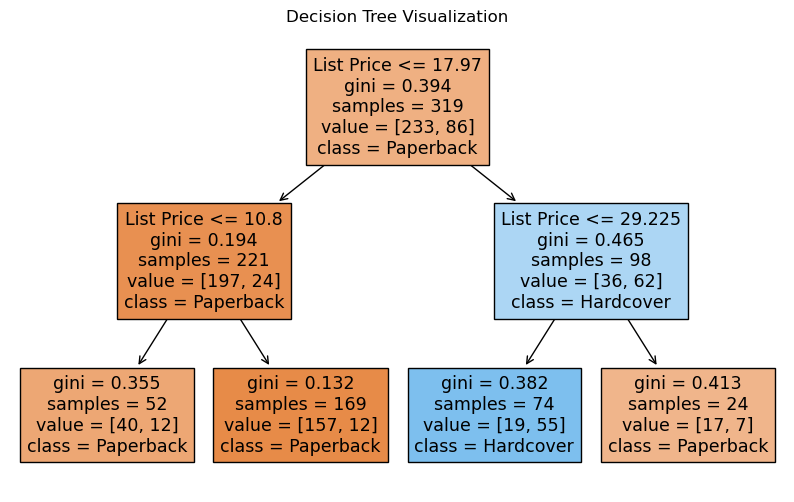

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

The decision tree, with a maximum depth of 2 and using only the List Price as its feature, makes predictions by splitting the data based on specific threshold values of the List Price. Here's how the decision-making process works:

Root Node (Level 0):

Decision Rule: Determines whether the List Price ≤ X₁.
If true, the tree proceeds to the left child node.
If false, it moves to the right child node.
Left Child Node (Level 1):

Decision Rule: Checks if the List Price ≤ X₂.
If true, it arrives at a leaf node that predicts one class.
If false, it reaches a leaf node predicting a different class.
Right Child Node (Level 1):

This node may either act as a leaf node or perform another split based on the List Price.

## "Post-lecture" HW [*submission along with "Pre-lecture" HW is due prior to next TUT*]


### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _Use the same **train/test split** dataset used so far_
> - _Train the **classification decision tree** `clf2` using **predictor variables** `NumPages`, `Thick` and `List Price`_ 
> - _Again **predict** whether or not a book is hard cover book or a paper back book_
> - _You can visualize your decision tree using the `tree.plot_tree(clf)` function shown in the `sklearn` documentation [here](
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#what-is-the-values-array-used-here) and [here](https://scikit-learn.org/stable/modules/tree.html); but, to make it more immediately readible it might be better to use `graphviz`, which is demonstrated in the `sklearn` documentation [here](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)_
>
> _If you are interested in how to find the best `max_depth` for a tree, ask ChatBot about "GridSearchCV"_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

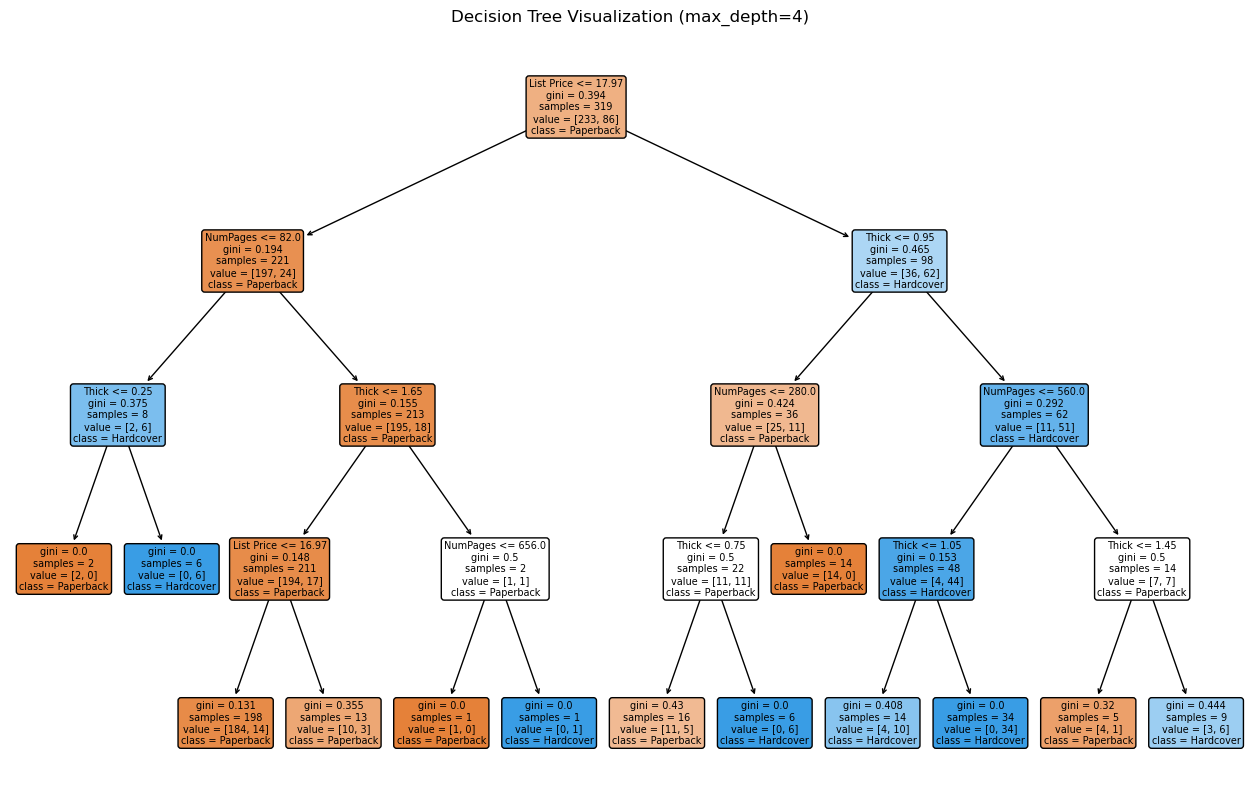

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the feature matrix (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback

# Train the DecisionTreeClassifier with max_depth set to 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

How predictions are made for the clf2 model:

The clf2 model, trained with the features NumPages, Thick, and List Price, and a maximum depth of 4, makes predictions through a series of decision splits based on these features. The goal of the model is to classify books as either hardcovers (1) or paperbacks (0).

Features Used for Predictions:
NumPages: The total number of pages in the book.
Thick: The thickness of the book.
List Price: The price of the book.
The model evaluates these features to determine the classification through a series of yes/no questions (splits).

At each split, the tree examines one feature against a specific threshold (e.g., List Price ≤ 15.00).
Depending on whether the condition is true or false, the model moves down either the left or right branch of the tree.
Maximum Depth of 4:

The tree applies at most 4 consecutive splits before reaching a leaf node (the final decision).
Each split progressively narrows the possible outcomes by isolating subsets of the data.
Leaf Node Decisions:

At the leaf nodes, the model predicts a class based on the majority class of the data reaching that node.
For instance, if most books in a leaf node are classified as hardcovers, the prediction for that node will be 1 (hardcover).
This structured process allows the tree to systematically evaluate and classify books based on their attributes.

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Hopefully you immediately thought to ask ChatBot to help you with this problem, but if you did you should take time to make sure you're clear about the key components of what the ChatBot is providing for you. You might want to know_
> - _what is a "positive" and what is a "negative"_
> - _how to read an `sklearn` confusion matrix_
> - _what leads to TP, TN, FP, and FN_
> - _whether `y_true` or `y_pred` go first in the `confusion_matrix` function_   
>
> _Have the visualizations you make use decimal numbers with three signifiant digits, such as `0.123` (and not as percentages like `12.3%`), probably based on `np.round()`_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
       
</details>

/tmp/ipykernel_102/1158629969.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)  # Convert 'Pub year' to int
/tmp/ipykernel_102/1158629969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)  # Convert 'NumPages' to int
/tmp/ipykernel_102/1158629969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

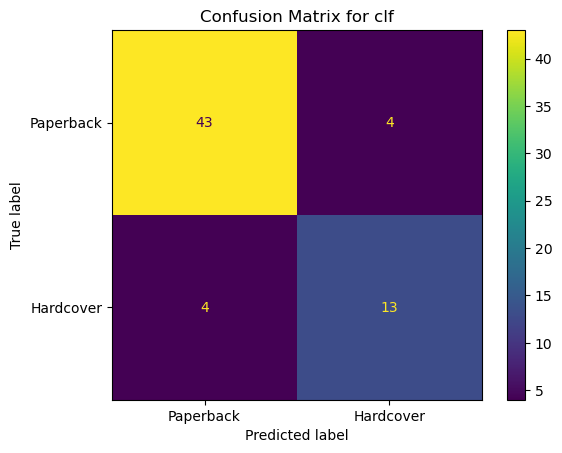

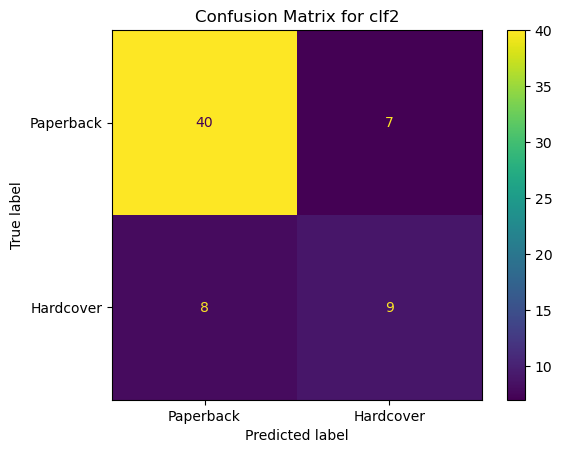

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Remove specified columns
ab_reduced_noNaN = ab_reduced.dropna()  # Drop rows with NaN values
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)  # Convert 'Pub year' to int
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)  # Convert 'NumPages' to int
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')  # Convert to category

train_ratio = 0.8
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_ratio, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(ab_reduced_noNaN_train[['List Price']], 
        pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'])

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']], 
         pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'])

X_test_clf = ab_reduced_noNaN_test[['List Price']].astype(float)  # For clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']].astype(float)  # For clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # True labels

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

cm_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot()
plt.title("Confusion Matrix for clf")
plt.show()

cm_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot()
plt.title("Confusion Matrix for clf2")
plt.show()

Sensitivity, Specificity and Accuracy for each of the Models:

In [19]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Calculate metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1]).ravel()
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # Recall for class 1 (Hardcover)
specificity_clf = tn_clf / (tn_clf + fp_clf)  # True Negative Rate for class 0 (Paperback)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Calculate metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1]).ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)  # Recall for class 1 (Hardcover)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)  # True Negative Rate for class 0 (Paperback)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Report results
results = {
    "Model": ["clf (List Price)", "clf2 (NumPages, Thick, List Price)"],
    "Sensitivity": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2],
    "Accuracy": [accuracy_clf, accuracy_clf2]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                                Model  Sensitivity  Specificity  Accuracy
0                    clf (List Price)     0.764706     0.914894  0.875000
1  clf2 (NumPages, Thick, List Price)     0.529412     0.851064  0.765625


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```


<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

What is causing the differences between the following two confusion matrices:

The differences between these two confusion matrices result from the features used for predictions. The first confusion matrix relies solely on **List Price** as the predictor, while the second utilizes **NumPages**, **Thick**, and **List Price**, offering the model additional information. These extra features enable the model to make more informed predictions, potentially enhancing its performance. 

Why the two confusion matrices above (for clf and clf2) are better:

The first confusion matrix for `clf` is based solely on **List Price**, restricting the model's ability to capture complex patterns since it depends on a single feature. In contrast, the second confusion matrix for `clf2` includes additional features (**NumPages** and **Thick**), enabling the model to utilize more information and achieve better performance in distinguishing between hardcovers and paperbacks.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>


<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
  
> The way a **classification decision tree** is fit is that at each step in the construction process of adding a new **decision node splitting rule** to the current **tree structure**, all possible **decision rules** for all possible **predictor variables** are considered, and the combination that improves the **prediction** the most (as measured by the criterion of either "Gini impurity" or "Shannon entropy") and in accordance with the rules of the decision tree (such as the `max_depth` argument) is added to the **classification decision tree**.  Thus overall "criterion" noted above improves with each new **decision node splitting rule**, so the improvement can thus be tracked and the improvement contributions attributed to the **feature** upon which the **decision node splitting rule** is based.  This means the relative contribution of each **predictor variable** to the overall explanatory power of the model can be calculated, and this is what the `.feature_importances_` attribute does. 
>
> Compared to the simplicity of understanding how different **covariates** contribute towards the final **predicted values** of **multiple linear regression models** (by just reading off the equation to see how predictions work), the the complexity of how all the different **features** interact and combine to together to create the final **predictions** from **classification decision trees** can be staggering. But the so-called **feature importance** heuristics allows us to judge how relatively important the overall contributions from different features are in the final decision tree predictions. Now we just need to be sure we're not **overfitting** our **classification decision trees** since they can be so **complex**. Fortunately, the "GridSearchCV" methodology mentioned in regards to finding the best `max_depth` setting for a tree is going to provide a general answer to the challenge of complexity and **overfitting** in **machine learning models** that is not too hard to understand (and which you might already have some guesses or a hunch about). 
> 
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
       
</details>

How to visualize feature Importances available for scikit-learn classification decision trees:


To visualize feature importances in a scikit-learn classification decision tree, you can utilize the feature_importances_ attribute, which reflects the relative contribution of each feature to the model's predictions.

clf2.feature_importances_:
This array shows the importance of each feature, with values normalized to sum to 1.
Features with higher values have a greater influence on the decision-making process.
Visualization:
A horizontal bar chart is commonly used to illustrate the importance of each feature clearly.
This visualization helps identify which features the decision tree considers most significant when making predictions.

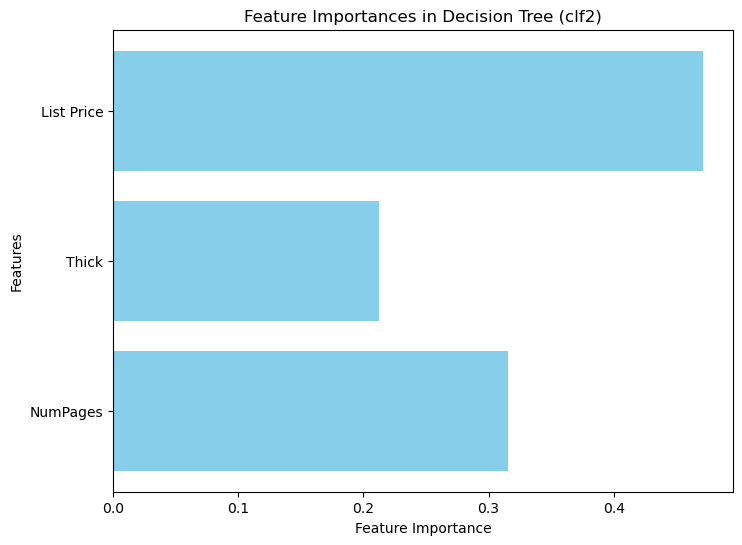

In [20]:
import matplotlib.pyplot as plt

# Feature names for clf2
features_clf2 = ['NumPages', 'Thick', 'List Price']

# Extract feature importances
importances_clf2 = clf2.feature_importances_

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.barh(features_clf2, importances_clf2, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree (clf2)')
plt.show()

**Report which predictor variable is most important for making predictions according to clf2**

In [22]:
features_clf2 = clf2.feature_names_in_
importances_clf2 = clf2.feature_importances_

most_important_feature = features_clf2[importances_clf2.argmax()]
most_important_feature_importance = importances_clf2.max()

print(f"Most important feature: {most_important_feature}")
print(f"Importance score: {most_important_feature_importance}")

Most important feature: List Price
Importance score: 0.47155515230989764


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Linear model regression predicts continuous real-valued averages for a given configuration of covariate values (or, feature values, if we're using machine learning terminology instead of statistical terminology), whereas a binary classification model such as a binary classification tree predicts 0/1 ("yes" or "no") outcomes (and gives the probability of a 1 "yes" (or "success") outcome from which a 1/0 "yes"/"no" prediction can be made; but, this is not what is being asked here. This question is asking "what's the difference in the way we can interpret and understand how the predictor variables influence the predictions in linear model regression based on the coefficients versus in binary decision trees based on the Feature Importances?"_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

In linear regression models, coefficients quantify the precise change in the target variable for a one-unit increase in a predictor, assuming all other variables remain constant. This enables a direct interpretation of the relationships. In contrast, decision trees use feature importances to indicate the contribution of each feature to reducing uncertainty (such as Gini impurity or entropy) across all splits. This provides a relative measure of importance rather than a direct measure of effect size. Unlike linear regression, feature importances do not specify the direction or magnitude of the target variable's change.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>
  
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

>  _Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of_  : )
> 
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
    
</details>

Yes.

ChatBot Transcript, Log: https://chatgpt.com/share/673fd5d3-7cac-8001-8236-d38d04444be3